In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
import tarfile
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
#Load tar.gz file into Python
#We are using day 1 of 7

tar = tarfile.open("/Users/xiwu/Desktop/Math-M148-data-january2023/hitdata7days_0.tar.gz","r:gz")

In [4]:
#Extracting filename from TarInfo object
#Gives name of file - can be regular data file or directory 

tar.next()

tn = tar.next()
print(tn.name)

tn1 = tar.next()
print(tn1.name)

tn2 = tar.next()
print(tn2.name)

tn3 = tar.next()
print(tn3.name)

tn4 = tar.next()
print(tn4.name)

tn5 = tar.next()
print(tn5.name)

tn6 = tar.next()
print(tn6.name)

tn7 = tar.next()
print(tn7.name)

tn8 = tar.next()
print(tn8.name)

hitdata7days/visitday=10/0017_part_00.parquet
hitdata7days/visitday=10/0050_part_00.parquet
hitdata7days/visitday=10/0049_part_00.parquet
hitdata7days/visitday=10/0033_part_00.parquet
hitdata7days/visitday=10/0001_part_00.parquet
hitdata7days/visitday=10/0018_part_00.parquet
hitdata7days/visitday=10/0083_part_00.parquet
hitdata7days/visitday=10/0065_part_00.parquet
hitdata7days/visitday=10/0117_part_00.parquet


In [5]:
#Reading info from parquet file
#Gives info on data types of columns in 1 parquet file
#Check if TarInfo is a file or a directory

print(tn.isreg())
print(tn.isdir())

pq.read_schema(tn.name)

True
False


hitdatahistorymkey: int64
filename: string
linenumber: int32
brandcode: string
visitoridhigh: decimal128(20, 0)
visitoridlow: decimal128(20, 0)
visitnumber: decimal128(10, 0)
visitdatetime: timestamp[ns]
visitdate: date32[day]
visitmonth: int32
fiscalyear: int16
fiscalmonthnumber: int16
fiscalweeknumber: int16
hit_time_gmt: decimal128(11, 0)
service: string
acceptlanguage: string
eventlist: string
homepage: string
ip: string
pageevent: decimal128(3, 0)
pageeventvar1: string
pageeventvar2: string
pagetype: string
pageurl: string
pagename: string
productlist: string
userserver: string
channel: string
sitesection: string
category: string
subcategory: string
subcategory2: string
pagecategory: string
searchterms: string
searchresults: string
refinementtype: string
refinementattribute: string
myaccountengagement: string
formanalysis: string
emailsubscriptionadd: string
emailsubscriptionremove: string
linklocation: string
navigationlinks: string
searchtype: string
businessunit: string
categor

In [6]:
#Read in parquet file as pandas DataFrame
#Turns parquet file into data frame

df = pd.read_parquet(tn.name)

df1 = pd.read_parquet(tn1.name)

df2 = pd.read_parquet(tn2.name)

df3 = pd.read_parquet(tn3.name)

df4 = pd.read_parquet(tn4.name)

df5 = pd.read_parquet(tn5.name)

df6 = pd.read_parquet(tn6.name)

df7 = pd.read_parquet(tn7.name)

df8 = pd.read_parquet(tn8.name)

df = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8])

In [118]:
df.head

<bound method NDFrame.head of         hitdatahistorymkey                                  filename  \
0              18598956716  hit_data_fingerhutcomprod_2022-12-10.tsv   
1              18602636734  hit_data_fingerhutcomprod_2022-12-10.tsv   
2              18604605529  hit_data_fingerhutcomprod_2022-12-10.tsv   
3              18603032733  hit_data_fingerhutcomprod_2022-12-10.tsv   
4              18603492850  hit_data_fingerhutcomprod_2022-12-10.tsv   
...                    ...                                       ...   
139071         18604020670  hit_data_fingerhutcomprod_2022-12-10.tsv   
139072         18604019350  hit_data_fingerhutcomprod_2022-12-10.tsv   
139073         18606546317  hit_data_fingerhutcomprod_2022-12-10.tsv   
139074         18606570125  hit_data_fingerhutcomprod_2022-12-10.tsv   
139075         18602733262  hit_data_fingerhutcomprod_2022-12-10.tsv   

        linenumber brandcode        visitoridhigh         visitoridlow  \
0            14603       FDM  2

In [49]:
#function useful to see variable value counts of a specific column... 
#i.e. for device type how many tablets, desktops, etc...

def seeValues(data, category):

    counts = pd.DataFrame(data.groupby([category])[category].count())

    counts.rename(columns={category: 'counts'}, inplace=True,)

    counts = counts.sort_values(['counts'], ascending=[0])

    graph = counts.reset_index()

    return graph

In [50]:
#get master list of visit ids that resulted in a purchase

ids_purchase = (df[df['checkoutthankyouflag'] == 1])['visitid'].drop_duplicates()

ids_purchase = ids_purchase.tolist()

In [51]:
#create DF w only beginning hit of the visit

#filter by checking when sevrer call time matches visit start time

df_first_visit = df[df['hit_time_gmt']==df['visitstarttimegmt']]

In [52]:
#oldest visits first

df_first_visit = df_first_visit.sort_values(by='hit_time_gmt', inplace = False)

In [53]:
#lastly, grab first click of each user, because there are some duplicates

df_first_visit = df_first_visit.drop_duplicates(subset=['visitid'], keep = "first", inplace = False)

In [54]:
#number of visits 

len(df_first_visit)

46657

In [55]:
#number of visits that resulted in a purchase

len(ids_purchase)

3714

In [56]:
#add target variable - assings value 1 if visit resulted in a purchase; 0 if not

target = list()

for ids in df_first_visit['visitid']:
    
    if ids in ids_purchase:
        
        target.append("1")
        
    else:
        
        target.append("0")
        
df_first_visit.insert(0, "target", target)

In [57]:
df_first_visit.head(3) 

,target,hitdatahistorymkey,filename,linenumber,brandcode,visitoridhigh,visitoridlow,visitnumber,visitdatetime,visitdate,visitmonth,fiscalyear,fiscalmonthnumber,fiscalweeknumber,hit_time_gmt,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar1,pageeventvar2,pagetype,pageurl,pagename,productlist,userserver,channel,sitesection,category,subcategory,subcategory2,pagecategory,searchterms,searchresults,refinementtype,refinementattribute,myaccountengagement,formanalysis,emailsubscriptionadd,emailsubscriptionremove,linklocation,navigationlinks,searchtype,businessunit,categoryxid,alternative,rbtused,resulttype,refinementattribute2,refinementattribute3,refinementattribute4,refinementattribute5,refinementattribute6,refinementattribute7,pagetypemerch,prop29,flashcreative,flashcreativeengagement,pdpengagement,prop33,prop34,prop35,prop36,prop37,prop38,prop39,prop40,prop41,language,prop43,prop44,prop45,prop46,prop47,prop48,prop49,prop50,ordernumber,state,useragent,zip,searchengine,excludehit,hier1,hier2,hier3,hier4,hier5,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,postttimeinfo,javascript,language_0001,os,plugins,resolution,lasthittimegmt,firsthittimegmt,visitstarttimegmt,lastpurchasetimegmt,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,postcampaign,sitesection_0001,category_0001,subcategory_0001,subcategory2_0001,internaltrackingcode,searchterms_0001,productfindingmethods,paymentmethod,shippingmethod,ordernumber_0001,warrantiespresented,warrantycategory,crosssoldproduct,crosssoldinfluence,crossselltype,evar16,promocode,formanalysis2,calculatorengagement,bazaarvoice,catalogid,customerconnection,evar23,evar24,evar25,evar26,scene7,evar28,addonsbuytogether,addonsymal,mvtparameters,evar34,evar35,evar36,evar37,evar38,evar39,language_0002,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,cdeemailoptin,evar48,paidsearchrawquery,evar50,post_evar1,post_evar2,post_evar3,post_evar4,post_evar5,post_evar6,post_evar7,post_evar8,post_evar9,post_evar10,post_evar11,post_evar12,post_evar13,post_evar14,post_evar15,post_evar16,post_evar17,post_evar18,post_evar19,post_evar20,post_evar21,post_evar22,post_evar23,post_evar24,post_evar25,post_evar26,post_evar27,post_evar28,post_evar29,post_evar30,post_evar33,post_evar34,post_evar35,post_evar36,post_evar37,post_evar38,post_evar39,post_evar40,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar47,post_evar48,post_evar49,post_evar50,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,visitid,cookieid,checkoutthankyouflag,evar51,evar52,evar53,evar54,evar55,evar56,evar57,evar58,evar59,evar60,evar61,evar62,evar63,evar64,evar65,evar66,evar67,evar68,evar69,evar70,evar71,evar72,evar73,evar74,evar75,evar76,evar77,evar78,evar79,evar80,evar81,evar82,evar83,evar84,evar85,evar86,evar87,evar88,evar89,evar90,evar91,evar92,evar93,evar94,evar95,evar96,evar97,evar98,evar99,evar100,initialloaddate,updatedloaddate,devicetype
40243,0,18598982044,hit_data_fingerhutcomprod_2022-12-10.tsv,39955,FDM,6219599642475497456,6803658491431386667,1,2022-12-10 00:00:00,2022-12-10,12,2022,12,50,1670652000,pe,en-US,"111,145,155,171,10038,10039,10049,10051,10096",U,94.176.80.21,10,None,no link_name,None,https://www.fingerhut.com/product/NOBV1,pdp:Los Angeles Pop Art Womenâ€™s Word-Art Pul...,None,None,None,None,None,None,None,product detail page,None,None,None,None,None,None,None,https://www.fingerhut.com/product/NOBV1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,6a5d0c4252424465bf6a0d0b738ebc90,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_1...,None,0,0,None,No

In [158]:
df_first_visit['eventlist'] = df_first_visit['eventlist'].str.split(',').str.len()
df_first_visit. columns

Index(['target', 'hitdatahistorymkey', 'filename', 'linenumber', 'brandcode',
       'visitoridhigh', 'visitoridlow', 'visitnumber', 'visitdatetime',
       'visitdate',
       ...
       'evar95', 'evar96', 'evar97', 'evar98', 'evar99', 'evar100',
       'initialloaddate', 'updatedloaddate', 'devicetype', 'test'],
      dtype='object', length=285)

In [133]:
dft = df_first_visit['eventlist']
dft

40243         111,145,155,171,10038,10039,10049,10051,10096
14640     287=4,288=0,20113=42,20538=400,20539=6,20540=3...
62244     20113=10,20538=0.0,20539=0.0,20540=0,20541=0,2...
97446     20113=24,20538=900,20539=580,20540=320,20541=2...
122350    20113=56,20538=600,20539=600,20540=0,20541=0,2...
                                ...                        
60417     20113=9,20538=0.0,20539=0.0,20540=0,20541=0,20...
79229     20113=40,20538=800,20539=69,20540=731,20541=21...
46180     20113=60,20538=0.0,20539=0.0,20540=0,20541=0,2...
42948     20538=0.0,20539=0.0,20540=0,20541=0,20170,111,...
135307    20598,111,112,122,126,127,129,143,145,155,171,...
Name: eventlist, Length: 46657, dtype: object

In [150]:
#data frame for percent of non-null values of each variable for PURCHASE VISITS

purchase_percent = pd.DataFrame()

df_first_visit_purchases = df_first_visit[df_first_visit['visitid'].isin(ids_purchase)]

In [61]:
for names in df_first_visit_purchases.columns:
    
    purchase_percent[names] = [100 * (sum(seeValues(df_first_visit_purchases, names)['counts'])) / len(df_first_visit_purchases)]

In [62]:
purchase_percent

,target,hitdatahistorymkey,filename,linenumber,brandcode,visitoridhigh,visitoridlow,visitnumber,visitdatetime,visitdate,visitmonth,fiscalyear,fiscalmonthnumber,fiscalweeknumber,hit_time_gmt,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar1,pageeventvar2,pagetype,pageurl,pagename,productlist,userserver,channel,sitesection,category,subcategory,subcategory2,pagecategory,searchterms,searchresults,refinementtype,refinementattribute,myaccountengagement,formanalysis,emailsubscriptionadd,emailsubscriptionremove,linklocation,navigationlinks,searchtype,businessunit,categoryxid,alternative,rbtused,resulttype,refinementattribute2,refinementattribute3,refinementattribute4,refinementattribute5,refinementattribute6,refinementattribute7,pagetypemerch,prop29,flashcreative,flashcreativeengagement,pdpengagement,prop33,prop34,prop35,prop36,prop37,prop38,prop39,prop40,prop41,language,prop43,prop44,prop45,prop46,prop47,prop48,prop49,prop50,ordernumber,state,useragent,zip,searchengine,excludehit,hier1,hier2,hier3,hier4,hier5,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,postttimeinfo,javascript,language_0001,os,plugins,resolution,lasthittimegmt,firsthittimegmt,visitstarttimegmt,lastpurchasetimegmt,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,postcampaign,sitesection_0001,category_0001,subcategory_0001,subcategory2_0001,internaltrackingcode,searchterms_0001,productfindingmethods,paymentmethod,shippingmethod,ordernumber_0001,warrantiespresented,warrantycategory,crosssoldproduct,crosssoldinfluence,crossselltype,evar16,promocode,formanalysis2,calculatorengagement,bazaarvoice,catalogid,customerconnection,evar23,evar24,evar25,evar26,scene7,evar28,addonsbuytogether,addonsymal,mvtparameters,evar34,evar35,evar36,evar37,evar38,evar39,language_0002,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,cdeemailoptin,evar48,paidsearchrawquery,evar50,post_evar1,post_evar2,post_evar3,post_evar4,post_evar5,post_evar6,post_evar7,post_evar8,post_evar9,post_evar10,post_evar11,post_evar12,post_evar13,post_evar14,post_evar15,post_evar16,post_evar17,post_evar18,post_evar19,post_evar20,post_evar21,post_evar22,post_evar23,post_evar24,post_evar25,post_evar26,post_evar27,post_evar28,post_evar29,post_evar30,post_evar33,post_evar34,post_evar35,post_evar36,post_evar37,post_evar38,post_evar39,post_evar40,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar47,post_evar48,post_evar49,post_evar50,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,visitid,cookieid,checkoutthankyouflag,evar51,evar52,evar53,evar54,evar55,evar56,evar57,evar58,evar59,evar60,evar61,evar62,evar63,evar64,evar65,evar66,evar67,evar68,evar69,evar70,evar71,evar72,evar73,evar74,evar75,evar76,evar77,evar78,evar79,evar80,evar81,evar82,evar83,evar84,evar85,evar86,evar87,evar88,evar89,evar90,evar91,evar92,evar93,evar94,evar95,evar96,evar97,evar98,evar99,evar100,initialloaddate,updatedloaddate,devicetype
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.959,99.959,100.0,100.0,100.0,0.041,29.602296,0.0,100.0,100.0,10.578106,0.0,0.0,68.921689,68.921689,68.921689,68.921689,88.109881,3.321033,7.298073,0.0,0.0,70.356704,60.516605,0.0,90.323903,0.0,0.0,0.0,0.0,0.0,0.0,0.082001,0.082001,0.205002,0.0,0.0,0.0,0.0,0.0,1.394014,83.230832,0.0,0.0,0.0,61.00861,90.323903,0.0,0.533005,1.02501,58.548585,0.0,0.082001,0.082001,4.592046,0.0,78.925789,0.738007,0.0,0.0,0.0,0.0,0.123001,0.451005,61.00861,100.0,61.00861,100.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,77.654777,71.627716,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.

Text(0, 0.5, 'Number of Variables')

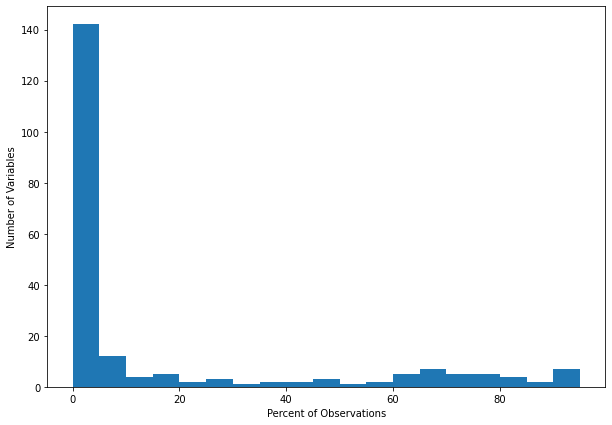

In [63]:
#histogram of variable frequency for PURCHASE VISITS

fig, ax = plt.subplots(figsize =(10, 7))

ax.hist(purchase_percent.iloc[0,:], bins = range(0,100,5))

plt.xlabel("Percent of Observations")
plt.ylabel("Number of Variables")

In [64]:
#Based on histogram distribution, we store features with a 5% or more values

features = list()

for names in purchase_percent.columns:
    
    if (purchase_percent[names][0]) > 5:

        features.append(names)

In [65]:
len(features)

142

In [66]:
#subset data frame with selected features

df_first_subset = df_first_visit[features]

In [67]:
df_first_subset.head(1)

,target,hitdatahistorymkey,filename,linenumber,brandcode,visitoridhigh,visitoridlow,visitnumber,visitdatetime,visitdate,visitmonth,fiscalyear,fiscalmonthnumber,fiscalweeknumber,hit_time_gmt,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar2,pageurl,pagename,productlist,sitesection,category,subcategory,subcategory2,pagecategory,searchresults,myaccountengagement,formanalysis,emailsubscriptionremove,prop29,prop33,prop34,prop38,prop44,state,useragent,zip,searchengine,excludehit,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,postttimeinfo,javascript,language_0001,os,resolution,lasthittimegmt,firsthittimegmt,visitstarttimegmt,lastpurchasetimegmt,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,productfindingmethods,paymentmethod,shippingmethod,warrantycategory,crosssoldproduct,evar23,evar24,scene7,evar28,addonsymal,mvtparameters,evar35,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,paidsearchrawquery,post_evar7,post_evar8,post_evar9,post_evar12,post_evar13,post_evar17,post_evar23,post_evar24,post_evar25,post_evar27,post_evar28,post_evar30,post_evar33,post_evar35,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar48,post_evar49,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,visitid,cookieid,checkoutthankyouflag,evar56,evar61,evar68,evar72,evar77,evar79,evar83,evar84,evar90,evar91,evar96,initialloaddate,updatedloaddate,devicetype
40243,0,18598982044,hit_data_fingerhutcomprod_2022-12-10.tsv,39955,FDM,6219599642475497456,6803658491431386667,1,2022-12-10,2022-12-10,12,2022,12,50,1670652000,pe,en-US,"111,145,155,171,10038,10039,10049,10051,10096",U,94.176.80.21,10,no link_name,https://www.fingerhut.com/product/NOBV1,pdp:Los Angeles Pop Art Womenâ€™s Word-Art Pul...,None,None,None,None,None,product detail page,None,None,None,https://www.fingerhut.com/product/NOBV1,None,None,6a5d0c4252424465bf6a0d0b738ebc90,None,None,None,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_1...,None,0,0,3609806571,518,1251,Y,N,Y,2,2,0,94.176.80.21,9/11/2022 22:0:0 5 480,7,45,1377654891,218,1670652000,1670652000,1670652000,0,0,None,None,0,2,0,san francisco,usa,ca,0,0,0,0,0,0,None,None,None,https://www.fingerhut.com/product/NOBV1,None,None,None,None,None,None,None,None,None,None,None,None,None,0,None,None,None,None,https://www.fingerhut.com/product/NOBV1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0,None,None,None,0,None,0,0,None,680365849143138666762195996424754974561,68036584914313866676219599642475497456,0,pdp:Los Angeles Pop Art Womenâ€™s Word-Art Pul...,None,None,lg,None,None,None,None,None,None,None,2022-12-11 02:43:15,2022-12-11 02:43:15,Desktop


In [68]:
# manually remove redundant variables, useless variables. or variables we did not want to weigh highly - such as date

removed = ['hitdatahistorymkey', 'filename', 'linenumber', 'visitoridhigh', 'visitoridlow',
          'visitdatetime', 'visitdate', 'visitmonth', 'visitid', 'fiscalyear', 'fiscalweeknumber', 'fiscalmonthnumber',
          'visitstarttimegmt', 'firsthittimegmt', 'lasthittimegmt', 'initialloaddate', 'updatedloaddate',
         'cookieid']

In [69]:
for variables in df_first_subset.columns:
    
    if variables in removed:
        
        features.remove(variables) 

In [70]:
len(features)

124

In [71]:
#subset dataframe with manually chosen features removed

df_second_subset = df_first_subset[features]

In [72]:
df_second_subset.head(1)

,target,brandcode,visitnumber,hit_time_gmt,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar2,pageurl,pagename,productlist,sitesection,category,subcategory,subcategory2,pagecategory,searchresults,myaccountengagement,formanalysis,emailsubscriptionremove,prop29,prop33,prop34,prop38,prop44,state,useragent,zip,searchengine,excludehit,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,postttimeinfo,javascript,language_0001,os,resolution,lastpurchasetimegmt,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,productfindingmethods,paymentmethod,shippingmethod,warrantycategory,crosssoldproduct,evar23,evar24,scene7,evar28,addonsymal,mvtparameters,evar35,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,paidsearchrawquery,post_evar7,post_evar8,post_evar9,post_evar12,post_evar13,post_evar17,post_evar23,post_evar24,post_evar25,post_evar27,post_evar28,post_evar30,post_evar33,post_evar35,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar48,post_evar49,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,checkoutthankyouflag,evar56,evar61,evar68,evar72,evar77,evar79,evar83,evar84,evar90,evar91,evar96,devicetype
40243,0,FDM,1,1670652000,pe,en-US,"111,145,155,171,10038,10039,10049,10051,10096",U,94.176.80.21,10,no link_name,https://www.fingerhut.com/product/NOBV1,pdp:Los Angeles Pop Art Womenâ€™s Word-Art Pul...,None,None,None,None,None,product detail page,None,None,None,https://www.fingerhut.com/product/NOBV1,None,None,6a5d0c4252424465bf6a0d0b738ebc90,None,None,None,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_1...,None,0,0,3609806571,518,1251,Y,N,Y,2,2,0,94.176.80.21,9/11/2022 22:0:0 5 480,7,45,1377654891,218,0,0,None,None,0,2,0,san francisco,usa,ca,0,0,0,0,0,0,None,None,None,https://www.fingerhut.com/product/NOBV1,None,None,None,None,None,None,None,None,None,None,None,None,None,0,None,None,None,None,https://www.fingerhut.com/product/NOBV1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0,None,None,None,0,None,0,0,None,0,pdp:Los Angeles Pop Art Womenâ€™s Word-Art Pul...,None,None,lg,None,None,None,None,None,None,None,Desktop


In [73]:
#replace n/a or type none values with a string "None"
#the absence of a value is sometimes useful information

df_second_subset = df_second_subset.fillna("None")

In [74]:
#variance threshold; 3rd subset method
#get rid of variables with very low variance i.e. same value every time

ord_enc = OrdinalEncoder()

variance_train = df_second_subset.loc[:, df_second_subset.columns != 'target']

variance_transformed = ord_enc.fit_transform(variance_train)

In [75]:
#using a threshold of 0.01 would mean dropping the column where 
#99% of the values are similar

var_thr = VarianceThreshold(threshold = 0.01) 

var_thr.fit(variance_transformed)

VarianceThreshold(threshold=0.01)

In [76]:
#create new subsetted data after variance threshold

df_third_subset = (variance_train.loc[:,var_thr.get_support()])

df_third_subset.insert(0, "target", target)

In [77]:
features = df_third_subset.columns.to_list()

In [78]:
len(features) 

114

In [79]:
#4th subset - random forest feature importance

#Class weights are balanced

clf = RandomForestClassifier(class_weight='balanced')

In [80]:
#Create test and train sets 

X_train, X_test, y_train, y_test = train_test_split(df_third_subset.iloc[:,1:], df_third_subset['target'], test_size=0.3)

In [81]:
#Transform categorical varaibles to become Ordinal

ord_enc = OrdinalEncoder()

X_train = ord_enc.fit_transform(X_train)

y_train = ord_enc.fit_transform(y_train.to_numpy().reshape(-1,1))

X_test = ord_enc.fit_transform(X_test)

y_test = ord_enc.fit_transform(y_test.to_numpy().reshape(-1,1))

In [82]:
#fit the model

clf.fit(X_train, y_train)

<ipython-input-82-e62dc23b8b2f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced')

In [83]:
#return the feature importances

clf.feature_importances_

array([3.02372021e-02, 2.77796396e-02, 7.88541847e-04, 3.24270420e-03,
       2.60640337e-02, 2.66237953e-02, 1.26691522e-03, 3.25851251e-03,
       1.46743202e-02, 9.14453962e-03, 3.92608220e-03, 4.12175298e-03,
       5.04971955e-03, 4.57473338e-03, 5.48601422e-03, 8.46619577e-03,
       2.43817626e-03, 1.92474893e-02, 5.66078739e-03, 1.25671636e-02,
       8.42663607e-03, 4.39747302e-03, 2.19345516e-02, 1.15036387e-03,
       1.88828640e-02, 9.70183173e-03, 1.91896486e-02, 1.21722950e-02,
       1.00791407e-03, 1.09625671e-02, 2.11053090e-02, 1.51672408e-02,
       1.81454203e-03, 3.15981090e-03, 4.69068509e-03, 1.74875040e-02,
       2.77888926e-02, 7.60795502e-04, 1.38108801e-02, 1.25574573e-02,
       1.41864427e-02, 7.98332318e-03, 9.48805752e-03, 7.03114459e-03,
       1.43112584e-03, 4.26427536e-03, 4.23083845e-04, 2.37008678e-02,
       5.07405466e-05, 1.89590389e-02, 1.78978364e-03, 3.23945944e-03,
       1.88120679e-03, 5.13811747e-03, 3.96620607e-03, 8.62731075e-04,
      

In [84]:
#accuracy of decision if tree if we were to use the whole data set 

clf.score(X_test, y_test)

0.9510644377768253

In [161]:
#print out the features and importances

feat_list = []

total_importance = 0
# Print the name and gini importance of each feature
for feature in zip(df_third_subset.iloc[:,1:].columns, clf.feature_importances_):
    feat_list.append(feature)
    total_importance += feature[1]

included_feats = []
# Print the name and gini importance of each feature
for feature in zip(df_third_subset.iloc[:,1:].columns, clf.feature_importances_):
    if feature[1] > .05:
        included_feats.append(feature[0])

print('\n',"Cumulative Importance =", total_importance)

# create DataFrame using data
df_imp = pd.DataFrame(feat_list, columns =['FEATURE', 'IMPORTANCE']).sort_values(by='IMPORTANCE', ascending=False)
df_imp['CUMSUM'] = df_imp['IMPORTANCE'].cumsum()

df_imp.head(50)





 Cumulative Importance = 1.0000000000000004


('visitnumber', 0.030237202146434605)

## correlation map

In [169]:
feat_list

[('visitnumber', 0.030237202146434605),
 ('hit_time_gmt', 0.02777963962226781),
 ('service', 0.0007885418471568771),
 ('acceptlanguage', 0.003242704202295192),
 ('eventlist', 0.026064033687772378),
 ('ip', 0.026623795299222874),
 ('pageevent', 0.0012669152159531247),
 ('pageeventvar2', 0.0032585125145021252),
 ('pageurl', 0.01467432015508825),
 ('pagename', 0.009144539619175909),
 ('productlist', 0.00392608220341826),
 ('sitesection', 0.004121752982986979),
 ('category', 0.0050497195469192645),
 ('subcategory', 0.004574733379375756),
 ('subcategory2', 0.005486014216541797),
 ('pagecategory', 0.008466195772950325),
 ('searchresults', 0.002438176258512165),
 ('myaccountengagement', 0.019247489250490028),
 ('formanalysis', 0.005660787393302958),
 ('emailsubscriptionremove', 0.012567163573150712),
 ('prop29', 0.008426636068937387),
 ('prop33', 0.004397473019027841),
 ('prop34', 0.02193455156094714),
 ('prop38', 0.0011503638651383635),
 ('prop44', 0.018882864019515198),
 ('state', 0.0097018

In [205]:
features_extract = [fest[0] for fest in feat_list]
len(features_extract)

113

In [204]:
#test = df_first_visit[features_extract]
test = df_first_visit
len(test.columns)
test.columns

Index(['target', 'hitdatahistorymkey', 'filename', 'linenumber', 'brandcode',
       'visitoridhigh', 'visitoridlow', 'visitnumber', 'visitdatetime',
       'visitdate',
       ...
       'evar95', 'evar96', 'evar97', 'evar98', 'evar99', 'evar100',
       'initialloaddate', 'updatedloaddate', 'devicetype', 'test'],
      dtype='object', length=285)

In [197]:
# convert all columns to numeric type
test = test.apply(pd.to_numeric, errors='coerce')

# drop columns with NaN values
test2 = test.dropna(axis=1)

# print the resulting DataFrame
test2

len(test2.columns)

47

In [198]:

# select columns with numeric values
numeric_cols = test.select_dtypes(include='number').columns
print('Numeric columns:', numeric_cols)

# select columns with string values
string_cols = test.select_dtypes(include='object').columns
print('String columns:', string_cols)


Numeric columns: Index(['target', 'hitdatahistorymkey', 'filename', 'linenumber', 'brandcode',
       'visitoridhigh', 'visitoridlow', 'visitnumber', 'visitdatetime',
       'visitdate',
       ...
       'evar95', 'evar96', 'evar97', 'evar98', 'evar99', 'evar100',
       'initialloaddate', 'updatedloaddate', 'devicetype', 'test'],
      dtype='object', length=285)
String columns: Index([], dtype='object')


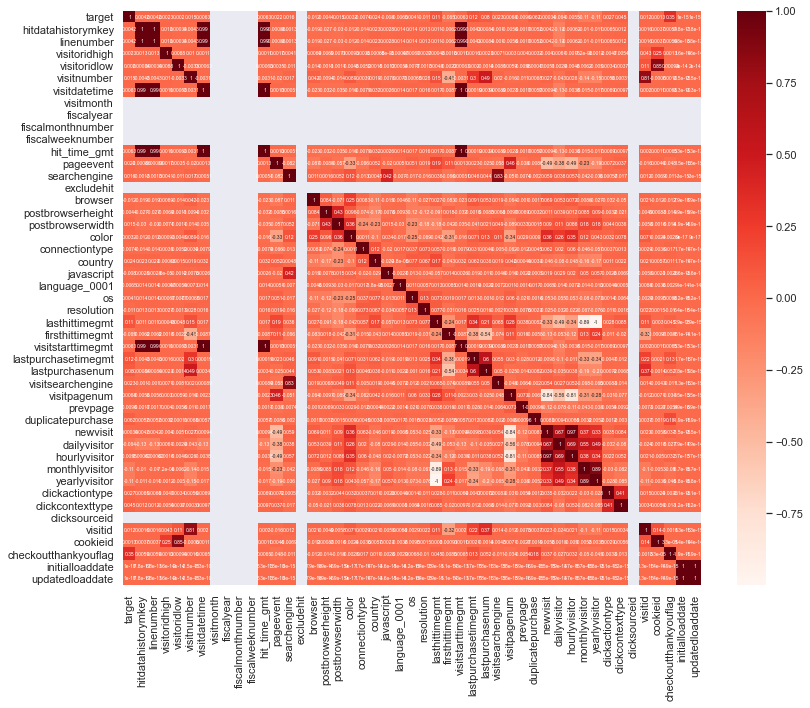

In [202]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = test2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, annot_kws={"fontsize":5})
plt.tight_layout()

In [203]:
# Set the correlation threshold
corr_threshold = 0.8

# Filter the correlation matrix
cor_filtered = cor.abs()[cor.abs() > corr_threshold]

# Get the most heavily correlated variables
corr_vars = cor_filtered.unstack().sort_values(ascending=False).drop_duplicates().index[:10]

# Create a correlation frame
corr_frame = pd.DataFrame(index=corr_vars, columns=['Correlation Coefficient'])
for var1, var2 in corr_vars:
    corr_val = cor.loc[var1, var2]
    corr_frame.loc[(var1, var2), 'Correlation Coefficient'] = corr_val

# Print the correlation frame
print(corr_frame)

                                      Correlation Coefficient
visitdatetime      hit_time_gmt                             1
connectiontype     connectiontype                           1
linenumber         hitdatahistorymkey                       1
yearlyvisitor      lasthittimegmt                   -0.997722
hit_time_gmt       linenumber                         0.98558
visitdatetime      linenumber                         0.98558
hit_time_gmt       hitdatahistorymkey                0.985556
hitdatahistorymkey visitdatetime                     0.985556
newvisit           hourlyvisitor                      0.96783
yearlyvisitor      monthlyvisitor                    0.891661


## convert visit date time to localized time(numeric value)

In [211]:
vt = pd.DataFrame(test['visitdatetime'])
vt

,visitdatetime
40243,2022-12-10 00:00:00
14640,2022-12-10 00:00:11
62244,2022-12-10 00:00:19
97446,2022-12-10 00:00:20
122350,2022-12-10 00:00:24
...,...
60417,2022-12-10 23:59:46
79229,2022-12-10 23:59:49
46180,2022-12-10 23:59:49
42948,2022-12-10 23:59:55


In [214]:
# Convert the datetime to localized time (numeric value)
vt['localtime'] = vt['visitdatetime'].apply(lambda x: x.timestamp())

# Check if 'localtime' values are numeric
is_numeric = pd.to_numeric(vt['localtime'], errors='coerce').notnull().all()


print(is_numeric)
vt

True


,visitdatetime,localtime
40243,2022-12-10 00:00:00,1.670630e+09
14640,2022-12-10 00:00:11,1.670630e+09
62244,2022-12-10 00:00:19,1.670630e+09
97446,2022-12-10 00:00:20,1.670630e+09
122350,2022-12-10 00:00:24,1.670630e+09
...,...,...
60417,2022-12-10 23:59:46,1.670717e+09
79229,2022-12-10 23:59:49,1.670717e+09
46180,2022-12-10 23:59:49,1.670717e+09
42948,2022-12-10 23:59:55,1.670717e+09


## df_imp

In [ ]:
df_imp

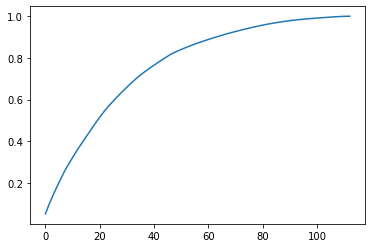

In [86]:
#plot to see how many variables we should take

#curve flattens at around 50 and it becomes diminishing returns 

#can do cutoff earlier too if computation is too much

plt.plot(range(0,len(df_imp),1), df_imp['CUMSUM'])  

In [88]:
df_second_subset[df_second_subset['checkoutthankyouflag'] == 1]

,target,brandcode,visitnumber,hit_time_gmt,service,acceptlanguage,eventlist,homepage,ip,pageevent,pageeventvar2,pageurl,pagename,productlist,sitesection,category,subcategory,subcategory2,pagecategory,searchresults,myaccountengagement,formanalysis,emailsubscriptionremove,prop29,prop33,prop34,prop38,prop44,state,useragent,zip,searchengine,excludehit,browser,postbrowserheight,postbrowserwidth,postcookies,postjavaenabled,postpersistentcookie,color,connectiontype,country,domain,postttimeinfo,javascript,language_0001,os,resolution,lastpurchasetimegmt,lastpurchasenum,firsthitpagename,visitstartpagename,visitsearchengine,visitpagenum,prevpage,geocity,geocountry,georegion,duplicatepurchase,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor,yearlyvisitor,productfindingmethods,paymentmethod,shippingmethod,warrantycategory,crosssoldproduct,evar23,evar24,scene7,evar28,addonsymal,mvtparameters,evar35,freshstartcomplete,opentobuy,institutionid,cdeincreasepayment,cdedeferredoffer,cdedspomodel,paidsearchrawquery,post_evar7,post_evar8,post_evar9,post_evar12,post_evar13,post_evar17,post_evar23,post_evar24,post_evar25,post_evar27,post_evar28,post_evar30,post_evar33,post_evar35,post_evar41,post_evar42,post_evar43,post_evar44,post_evar45,post_evar46,post_evar48,post_evar49,clickaction,clickactiontype,clickcontext,clickcontexttype,clicksourceid,clicktag,checkoutthankyouflag,evar56,evar61,evar68,evar72,evar77,evar79,evar83,evar84,evar90,evar91,evar96,devicetype
122739,1,FDM,2,1670652135,ss,"en-US,en;q=0.9","20462=1,20113=59,20538=600,20539=434,20540=166...",U,73.114.181.124,0,None,https://www.fingerhut.com/checkout/receipt/ORD...,checkout:confirmation,None,checkout,checkout:confirmation,checkout:confirmation,checkout:confirmation,checkout,None,52,EligibleToEnroll,https://www.fingerhut.com/checkout/receipt/ORD...,Prospect,Prospect,ee5453f577774aa4a9b315da20525c14,1002,Fetti,VT,Mozilla/5.0 (Linux; Android 12; SM-A025V) Appl...,05201,0,0,3212457636,785,412,Y,N,Y,2,2,304,comcast.net,10/11/2022 1:2:14 6 300,7,45,1343453731,270,1670638893,1,my account:credit application,checkout:confirmation,0,1,0,bennington,usa,vt,0,1,1,1,0,0,None,bluestemBrandsCredit,standard shipping,https://www.fingerhut.com/checkout/receipt/ORD...,5152286229,5152286229,None,None,None,None,FET,None,None,None,so_targeting : Fetti,Fetti,HP_PB2_VPFS_BAU_MKTGTST,1,None,None,bluestemBrandsCredit,standard shipping,https://www.fingerhut.com/checkout/receipt/ORD...,5152286229,None,5152286229,None,None,None,None,None,FET,None,None,None,so_targeting : Fetti,Fetti,HP_PB2_VPFS_BAU_MKTGTST,1,None,None,None,0,None,0,0,None,1,checkout:confirmation,None,so612_cms,xs,None,None,None,None,None,None,None,Tablet
55407,1,FDM,12,1670652217,ss,"en-US,en;q=0.9","20462=1,20113=30,20538=1700,20539=1200,20540=5...",U,138.43.190.216,0,None,https://www.fingerhut.com/checkout/receipt/ORD...,checkout:confirmation,None,checkout,checkout:confirmation,checkout:confirmation,checkout:confirmation,checkout,None,48,AlreadyEnrolled,https://www.fingerhut.com/checkout/receipt/ORD...,Mature,Mature,27e716c7bfd7486d8f8927fc39ea84f9,1002,Fetti,TN,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,37887,0,0,346775472,526,320,Y,N,Y,1,2,304,highland.net,10/11/2022 1:3:37 6 300,7,45,977078363,428,1670609523,1,my account:main page,checkout:confirmation,0,1,0,wartburg,usa,tn,0,1,1,1,0,0,None,bluestemBrandsCredit,standard shipping,https://www.fingerhut.com/checkout/receipt/ORD...,3879373833,3879373833,EMAIL01 : 11:DEF01 : 11:CLIM01 : 81:CDESEGG : ...,None,5_Fragile_Mature,0.2302,FET,None,FDM,None,so_targeting : Fetti,Fetti,None,1,None,None,bluestemBrandsCredit,standard shipping,https://www.fingerhut.com/checkout/receipt/ORD...,3879373833,None,3879373833,EMAIL01 : 11:DEF01 : 11:CLIM01 : 81:CDESEGG : ...,None,None,5_Fragile_Mature,0.2302,FET,None,FDM,None,so_targeting : Fetti,Fetti,None,1,None,None,None,0,None,0,0,None,1,checkout:confirmation,None,so612_cms,xs,None,None,487,f221202_PB_LCM_50_min_VPFS_CMHPJ_TAG84_MKTGTST,None,None,None,Mobil

# device type

In [90]:
X=df_second_subset['devicetype']
Y=df_second_subset['checkoutthankyouflag'] ## target

In [91]:
X = pd.get_dummies(df_second_subset['devicetype'])
X

,Desktop,Mobile,Tablet,Unknown
40243,1,0,0,0
14640,0,0,1,0
62244,0,1,0,0
97446,0,1,0,0
122350,1,0,0,0
...,...,...,...,...
60417,0,1,0,0
79229,0,1,0,0
46180,0,0,1,0
42948,1,0,0,0


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

model=DecisionTreeClassifier() ## define 
#param={'criterion':['gini','entropy'],'max_depth':range(3,50)}
param={'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [3, 4, 5, 6, 7, 8, 9],
              'criterion' :['gini','entropy'],
               'splitter': ['best', 'random'],
             }
grid_search=GridSearchCV(model, param,cv=10,n_jobs=-1)
grid_search.fit(X_train, y_train)
print (grid_search.best_score_, grid_search.best_params_)

0.9933555899616353 {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'splitter': 'best'}


In [97]:
# final_model=DecisionTreeClassifier()
# #final_model=DecisionTreeClassifier(**grid_search.best_params_)
# final_model.fit(Xtrain_pca, y_train)
# y_pred=final_model.predict(Xtest_pca)
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn import metrics


final_model=DecisionTreeClassifier()
#final_model=DecisionTreeClassifier(**grid_search.best_params_)
final_model.fit(X_train, y_train)
y_pred=final_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9933561937419632


In [103]:
test=pd.DataFrame(final_model.feature_importances_)
test['checkoutdevice']=X.columns

In [104]:
# test
# test.columns
test = test.rename(columns={0: 'rate'})
test = test.sort_values(by='rate', ascending=False)
test


,rate,checkoutdevice
0,0.733416,Desktop
2,0.264699,Tablet
1,0.001885,Mobile
3,0.000000,Unknown


Text(0.5, 1.0, 'checkout devices')

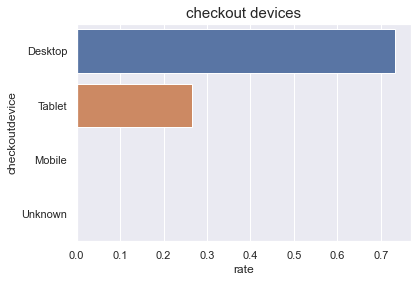

In [107]:
#sns.barplot(x='rate',y='check out categories',data=test,orient='h'
           #).set(title='categories while checking out for all devices')
import seaborn as sns


sns.set()
ax = sns.barplot(x=test.rate,y=test.checkoutdevice,orient='h')

#plt.title('Sales Data', fontsize=20)
ax.axes.set_title('checkout devices',fontsize=15)
#ax.set(title = 'Top 20 categories while checking out for all devices', fontsize=20)
# sns.set(rc={'figure.figsize':(5,5)})
#sns.barplot(x='rate',y='check out categories',data=test,orient='h').set(title='categories while checking out for all devices')

## life stage

In [109]:
df_second_subset['prop29']

40243         None
14640     Emerging
62244         None
97446       Mature
122350      Mature
            ...   
60417         None
79229         None
46180         None
42948         None
135307    Emerging
Name: prop29, Length: 46657, dtype: object

In [110]:
X=df_second_subset['prop29']
Y=df_second_subset['checkoutthankyouflag'] ## target

In [111]:
X = pd.get_dummies(df_second_subset['prop29'])
X

,Cash,Emerging,FSApproved,FSCleanup,FSGrad,FSRetry,FreshStart,Graduate-FS,Mature,New,None,Prospect
40243,0,0,0,0,0,0,0,0,0,0,1,0
14640,0,1,0,0,0,0,0,0,0,0,0,0
62244,0,0,0,0,0,0,0,0,0,0,1,0
97446,0,0,0,0,0,0,0,0,1,0,0,0
122350,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
60417,0,0,0,0,0,0,0,0,0,0,1,0
79229,0,0,0,0,0,0,0,0,0,0,1,0
46180,0,0,0,0,0,0,0,0,0,0,1,0
42948,0,0,0,0,0,0,0,0,0,0,1,0


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [113]:
# final_model=DecisionTreeClassifier()
# #final_model=DecisionTreeClassifier(**grid_search.best_params_)
# final_model.fit(Xtrain_pca, y_train)
# y_pred=final_model.predict(Xtest_pca)
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn import metrics


final_model=DecisionTreeClassifier()
#final_model=DecisionTreeClassifier(**grid_search.best_params_)
final_model.fit(X_train, y_train)
y_pred=final_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9933561937419632


In [114]:
test=pd.DataFrame(final_model.feature_importances_)
test['prop29']=X.columns

In [115]:
# test
# test.columns
test = test.rename(columns={0: 'rate'})
test = test.sort_values(by='rate', ascending=False)
test


,rate,prop29
10,0.843414,None
11,0.075694,Prospect
1,0.035197,Emerging
8,0.021319,Mature
9,0.013692,New
3,0.004082,FSCleanup
6,0.003534,FreshStart
4,0.002347,FSGrad
0,0.000319,Cash
2,0.000312,FSApproved


Text(0.5, 1.0, 'checkout devices')

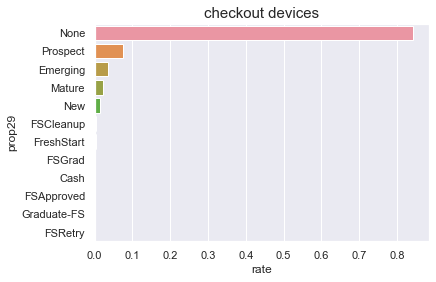

In [117]:
#sns.barplot(x='rate',y='check out categories',data=test,orient='h'
           #).set(title='categories while checking out for all devices')
import seaborn as sns


sns.set()
ax = sns.barplot(x=test.rate,y=test.prop29,orient='h')

#plt.title('Sales Data', fontsize=20)
ax.axes.set_title('checkout devices',fontsize=15)
#ax.set(title = 'Top 20 categories while checking out for all devices', fontsize=20)
# sns.set(rc={'figure.figsize':(5,5)})
#sns.barplot(x='rate',y='check out categories',data=test,orient='h').set(title='categories while checking out for all devices')